In [287]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [288]:
breast_cancer_d = pd.read_csv('data.csv')
breast_cancer_d.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [289]:
breast_cancer_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [290]:
breast_cancer_d = breast_cancer_d.drop(['Unnamed: 32','id'], axis = 1)



In [291]:
breast_cancer_d.diagnosis = [1 if each == "M" else 0 for each in breast_cancer_d.diagnosis]
breast_cancer_d

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [292]:
y = breast_cancer_d.diagnosis.values
x_d = breast_cancer_d.drop(['diagnosis'], axis =1)

In [293]:
x = (x_d - np.min(x_d))/(np.max(x_d) - np.min(x_d))
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.004229,0.002440,0.028867,0.235308,0.000028,0.000065,0.000071,0.000035,0.000057,0.000019,...,0.005966,0.004074,0.043394,0.474612,0.000038,0.000156,0.000167,0.000062,0.000108,0.000028
1,0.004835,0.004177,0.031241,0.311707,0.000020,0.000018,0.000020,0.000016,0.000043,0.000013,...,0.005874,0.005503,0.037330,0.459803,0.000029,0.000044,0.000057,0.000044,0.000065,0.000021
2,0.004629,0.004995,0.030559,0.282793,0.000026,0.000038,0.000046,0.000030,0.000049,0.000014,...,0.005541,0.006001,0.035849,0.401740,0.000034,0.000100,0.000106,0.000057,0.000085,0.000021
3,0.002685,0.004791,0.018237,0.090762,0.000033,0.000067,0.000057,0.000025,0.000061,0.000023,...,0.003505,0.006229,0.023242,0.133451,0.000049,0.000204,0.000161,0.000061,0.000156,0.000041
4,0.004770,0.003371,0.031758,0.304890,0.000024,0.000031,0.000047,0.000025,0.000043,0.000014,...,0.005299,0.003919,0.035778,0.370240,0.000032,0.000048,0.000094,0.000038,0.000056,0.000018


In [294]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size = 0.15, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (30, 483)
x_test:  (30, 86)
y_train:  (483,)
y_test:  (86,)


In [295]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

In [296]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [297]:

def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]      
 
    derivative_weight = (np.dot(x_train, (
        (y_head - y_train).T))) / x_train.shape[1] 
    derivative_bias = np.sum(
        y_head-y_train) / x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    return cost, gradients

In [298]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
 
    for i in range(number_of_iterarion):

        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
 
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration % i: % f" %(i, cost))
 
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation ='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [299]:
def predict(w, b, x_test):

    z = sigmoid(np.dot(w.T, x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
 
    for i in range(z.shape[1]):
        if z[0, i]<= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
 
    return Y_prediction

Cost after iteration  0:  0.692860
Cost after iteration  10:  0.638692
Cost after iteration  20:  0.613871
Cost after iteration  30:  0.591776
Cost after iteration  40:  0.572024
Cost after iteration  50:  0.554314
Cost after iteration  60:  0.538375
Cost after iteration  70:  0.523968
Cost after iteration  80:  0.510891
Cost after iteration  90:  0.498971


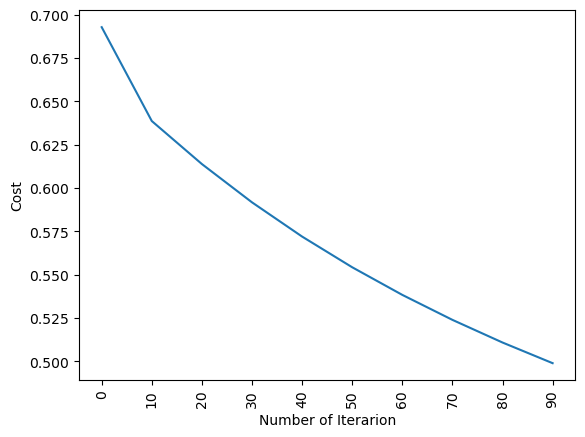

train accuracy: 80.74534161490683 %
test accuracy: 81.3953488372093 %


In [307]:
def logistic_regression(x_train, y_train, x_test, y_test, 
                        learning_rate,  num_iterations):
 
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
     
    parameters, gradients, cost_list = update(
        w, b, x_train, y_train, learning_rate, num_iterations)
     
    y_prediction_test = predict(
        parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(
        parameters["weight"], parameters["bias"], x_train)
 
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
     
logistic_regression(x_train, y_train, x_test, 
                    y_test, learning_rate = 1, num_iterations = 100) 

In [308]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(
    logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(
    logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.8953488372093024 
train accuracy: 0.8633540372670807 
